**Búsqueda,selección y descripción del Dataset**

https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, con base en mediciones diagnósticas, si una paciente tiene diabetes.

Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todas las pacientes aquí son mujeres de al menos 21 años de edad y de ascendencia indígena pima.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- **Outcome: Class variable (0 or 1)**

Este conjunto de datos está relacionado con un tema de alta relevancia en el ámbito de la salud pública y la medicina, específicamente para la predicción de enfermedades como la diabetes. La diabetes es una de las enfermedades crónicas más prevalentes en el mundo, y la capacidad de predecirla a partir de factores como glucosa en sangre, presión arterial, índice de masa corporal, entre otros, es de suma importancia tanto para la prevención como para el tratamiento efectivo. Este tipo de modelo puede ayudar a identificar personas con riesgo elevado, mejorando la toma de decisiones médicas y la asignación de recursos.

In [1]:
import pandas as pd

#Cargar Datos

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
data = pd.read_csv('diabetes.csv')

# Verificar valores faltantes
print(data.isnull().sum())

def count_outliers(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Solo variables numéricas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Definir los límites para outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        # Contar los valores fuera de los límites
        outliers[col] = len(df[(df[col] < lower_limit) | (df[col] > upper_limit)])
    # Convertir a un DataFrame para mostrarlo de manera ordenada
    outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
    outliers_df = outliers_df.sort_values(by='Outliers', ascending=False)  # Ordenar de mayor a menor
    return outliers_df

# Mostrar la cantidad de outliers por variable en formato de tabla
outliers_count = count_outliers(data)
print("\nCantidad de outliers por variable:")
print(outliers_count)

# Mostrar una muestra de los datos
data.head(10) #muestra las 10 primeras filas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cantidad de outliers por variable:
                   Variable  Outliers
2             BloodPressure        45
4                   Insulin        34
6  DiabetesPedigreeFunction        29
5                       BMI        19
7                       Age         9
1                   Glucose         5
0               Pregnancies         4
3             SkinThickness         1
8                   Outcome         0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


**No puede haber valores 0 en BloddPressure,Glucose,SkinThickness,Insulin,BMI**

In [4]:
# Filtrar las filas donde las variables clave sean diferentes de 0
data = data[(data['BloodPressure'] != 0) &
            (data['Glucose'] != 0) &
            (data['SkinThickness'] != 0) &
            (data['Insulin'] != 0) &
            (data['BMI'] != 0)]


**Análisis Exploratorio**

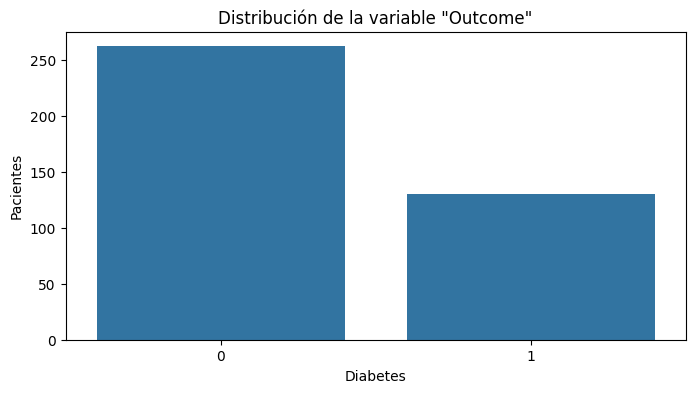

<Figure size 640x480 with 0 Axes>

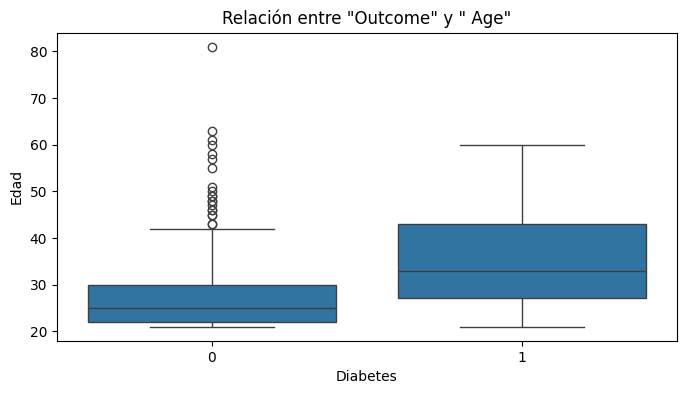

<Figure size 640x480 with 0 Axes>

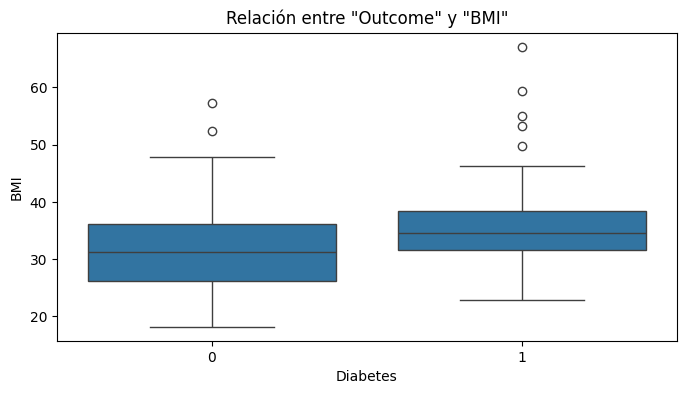

In [5]:
import seaborn as sns #librería especializada en gráficos estadísticos bonitos y fáciles
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribución de la variable "Outcome"')
plt.xlabel('Diabetes')
plt.ylabel('Pacientes')
plt.show()
plt.figure()
plt.figure(figsize=(8,4))
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Relación entre "Outcome" y " Age"')
plt.xlabel('Diabetes')
plt.ylabel('Edad')
plt.show()
plt.figure()
plt.figure(figsize=(8,4))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('Relación entre "Outcome" y "BMI"')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()


**Interpretación** del Gráfico 1: Distribución de la Variable **“Outcome”**

El gráfico de barras muestra cómo se distribuye la presencia de diabetes en la muestra. Se observa un desbalance moderado, donde la mayor parte de los pacientes corresponde al grupo sin diabetes (0), con poco más de 250 casos, frente a aproximadamente 120 pacientes diagnosticados (1).
Esta diferencia sugiere que la base presenta una cantidad mayor de individuos sanos, algo común en datasets clínicos.

**Interpretación** del Gráfico 2: Relación entre “Outcome” y **“Age”**

El boxplot muestra una tendencia clara: los pacientes con diabetes (1) tienden a ser mayores en edad que quienes no presentan la condición (0).
El grupo diabético exhibe una mediana más alta, junto con valores superiores que alcanzan edades rondando a los35 años.
Por el contrario, el grupo sin diabetes posee una mediana más baja y concentra más valores en edades jóvenes y adultas tempranas, lo que sugiere que el riesgo aumenta conforme avanza la edad.
Esto es coherente con el comportamiento epidemiológico de la enfermedad, donde la probabilidad de diagnóstico tiende a crecer en etapas de adultez media y avanzada.

**Interpretación** del Gráfico 3: Relación entre “Outcome” y **“BMI”**

El tercer boxplot revela una relación evidente entre el índice de masa corporal (BMI) y el diagnóstico de diabetes.
Los pacientes con diabetes (1) presentan un BMI claramente mayor, con una mediana más alta y una mayor dispersión hacia valores elevados, superando con frecuencia los 35–40 kg/m².
En cambio, quienes no padecen la enfermedad (0) muestran un BMI más moderado, con una mediana considerablemente menor y menor presencia de valores extremos.

Este patrón sugiere que el sobrepeso y la obesidad están estrechamente asociados al desarrollo de diabetes tipo 2 en esta muestra, lo cual coincide con evidencia clínica ampliamente documentada.

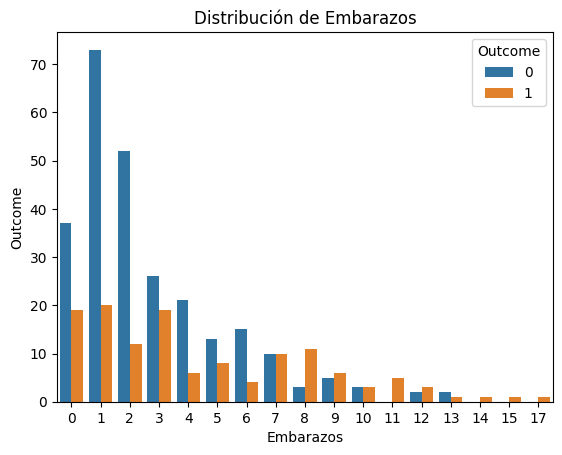

In [6]:
sns.countplot(x='Pregnancies', hue='Outcome', data=data)
plt.title('Distribución de Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Outcome')
plt.show()

El gráfico de barras evidencia una relación clara entre la cantidad de embarazos y la probabilidad de presentar diabetes (Outcome = 1). En los niveles más bajos de embarazos (0, 1 y 2), predominan ampliamente los casos negativos (Outcome = 0), lo que indica que las mujeres con pocos embarazos tienen menor probabilidad de desarrollar la condición.

A medida que aumenta el número de embarazos —particularmente desde 4 en adelante— comienza a observarse un incremento progresivo en las respuestas positivas (Outcome = 1).

Este patrón sugiere que un mayor número de embarazos podría estar asociado a un mayor riesgo metabólico, posiblemente debido a los cambios fisiológicos acumulativos que se producen durante la gestación. En conjunto, el gráfico respalda la existencia de una relación ascendente entre la cantidad de embarazos y la probabilidad de desarrollar diabetes.

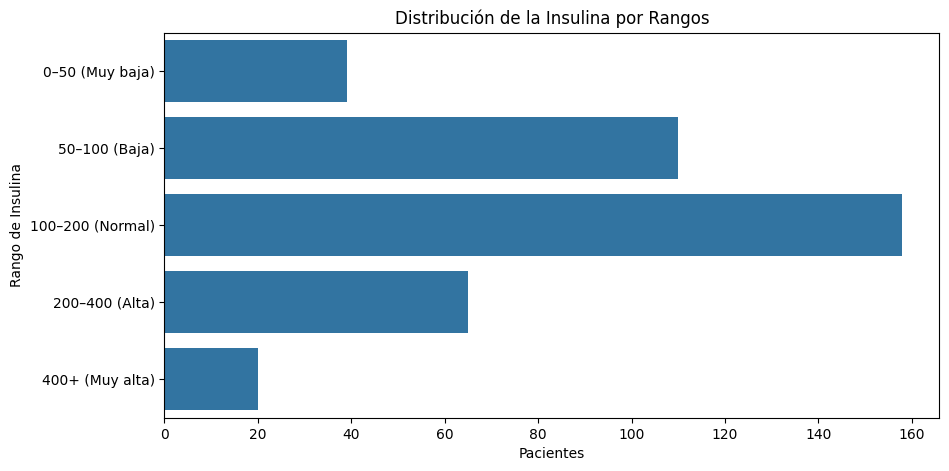

In [7]:
# Crear rangos para Insulin
bins = [0, 50, 100, 200, 400, 900]
labels = [
    '0–50 (Muy baja)',
    '50–100 (Baja)',
    '100–200 (Normal)',
    '200–400 (Alta)',
    '400+ (Muy alta)'
]

data['Insulin_Range'] = pd.cut(data['Insulin'], bins=bins, labels=labels, include_lowest=True)

# Graficar la distribución por rangos
plt.figure(figsize=(10,5))
sns.countplot(y='Insulin_Range', data=data, order=labels)
plt.title('Distribución de la Insulina por Rangos')
plt.xlabel('Pacientes')
plt.ylabel('Rango de Insulina')
plt.show()



El gráfico muestra la distribución de los niveles de insulina entre los pacientes, segmentados en rangos. La mayor parte de los pacientes presenta niveles de insulina normales, entre 100 y 200 unidades.Menos pacientes muestran niveles de insulina elevados (200-400 unidades) o bajos(0-50). Finalmente, los pacientes con niveles de insulina muy altos (más de 400 unidades) son una pequeña fracción de la muestra.

Este comportamiento es esperable , ya que corresponde a una distribución normal.

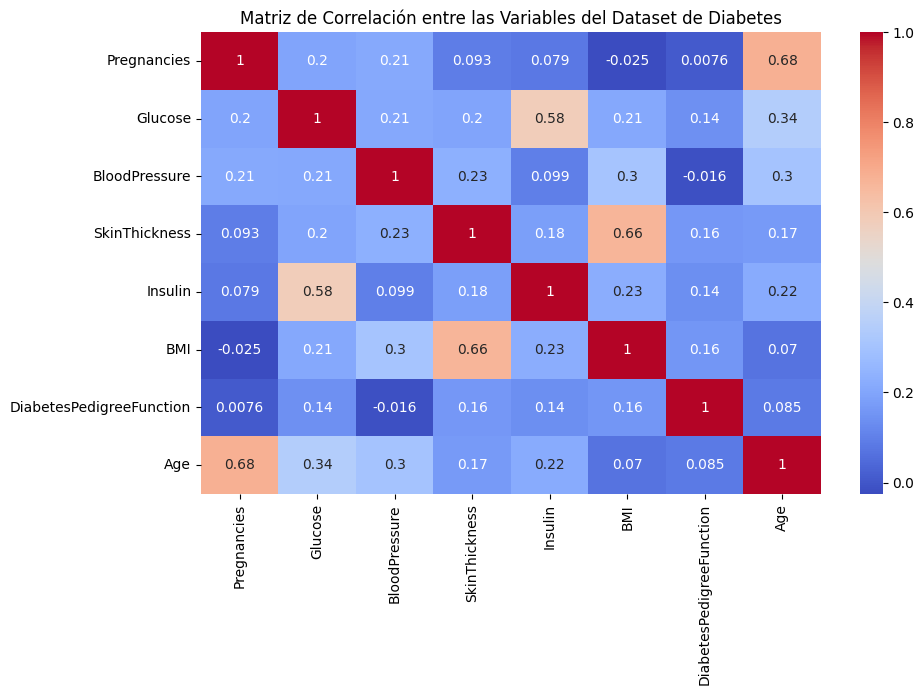

In [8]:

numeric_data = data[['Pregnancies', 'Glucose', 'BloodPressure',
                     'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']]

# Crear la matriz de correlación
correlation_matrix = numeric_data.corr()

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre las Variables del Dataset de Diabetes')
plt.show()


Vemos q ningún par de variables independientes están altamente correlacionada(>0.95) por lo que incorporar todas podría ser viable.

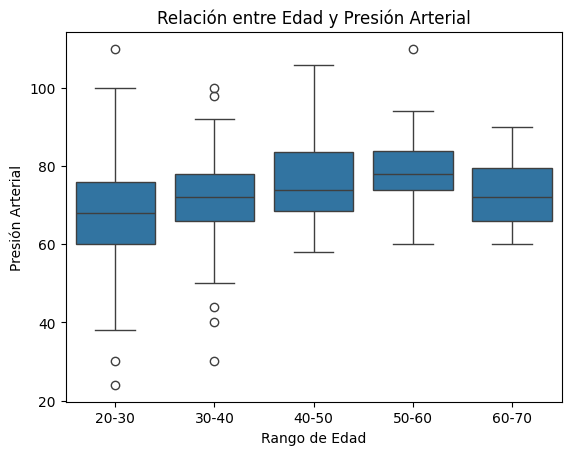

In [9]:

# Dividir la variable 'Age' en rangos de 10 años
bins = [20, 30, 40, 50, 60, 70]  # Definir los rangos de edad
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']  # Etiquetas para los rangos

# Crear una nueva columna con los rangos de edad
data['Age_Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Graficar el boxplot con los rangos de edad
sns.boxplot(x='Age_Range', y='BloodPressure', data=data)
plt.title('Relación entre Edad y Presión Arterial')
plt.xlabel('Rango de Edad')
plt.ylabel('Presión Arterial')
plt.show()


**Interpretación**

En el análisis del boxplot que muestra la relación entre edad y presión arterial, se observa que el grupo de 20-30 años presenta la mayor variabilidad en la presión arterial, con un rango amplio y una gran dispersión de datos, incluyendo varios valores atípicos. Este grupo tiene una mediana relativamente baja de presión arterial, pero la dispersión es considerable, lo que indica que existen pacientes dentro de este rango de edad con presiones mucho más altas o bajas de lo esperado.

A medida que avanzamos hacia los grupos de 30-40 hasta 60-70 años, la presión arterial se estabiliza en rangos más altos, aunque la dispersión sigue existiendo, sobre todo en los rangos 50-60 y 60-70. Esto refleja que, en general, la presión arterial aumenta con la edad, pero algunos pacientes aún presentan variabilidad en sus niveles de presión.


**Para una mejor interpretabilidad escalaremos las variables con escalas muy diferentes**

In [10]:
from sklearn.preprocessing import StandardScaler

# Copia del dataset para no modificar el original
df = data.copy()

# Seleccionar las columnas que se deben escalar
columnas_a_escalar = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'DiabetesPedigreeFunction'
]

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar solo estas columnas
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

# Mostrar las primeras filas del dataset ya escalado
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_Range,Age_Range
3,1,-1.091046,-0.373655,-0.585110,-0.522842,28.1,-1.031876,21,0,50–100 (Baja),20-30
4,0,0.466314,-2.456964,0.557421,0.100631,43.1,5.115111,33,1,100–200 (Normal),30-40
6,3,-1.447941,-1.655691,0.271788,-0.573394,31.0,-0.797126,26,1,50–100 (Baja),20-30
8,2,2.413014,-0.053146,1.509530,3.260122,30.5,-1.057960,53,1,400+ (Muy alta),50-60
13,1,2.153454,-0.854419,-0.585110,5.812990,30.1,-0.362402,59,1,400+ (Muy alta),50-60


In [11]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X=df[['Pregnancies', 'Glucose', 'BloodPressure',
                     'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Mostrar las dimensiones de los conjuntos de datos
print(f'Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}')

Datos de entrenamiento: (274, 8), Datos de prueba: (118, 8)


Interpretación:

El dataset fue dividido en 70% para entrenamiento (274 observaciones) y 30% para prueba (118 observaciones).

Cada observación contiene 8 variables predictoras (Glucose,Pregnacies, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction y Age).

Esta separación permite entrenar el modelo con una parte de los datos y luego evaluar su desempeño en datos nuevos que el modelo no ha visto, lo cual evita el overfitting y asegura una evaluación objetiva.

In [12]:
import statsmodels.api as sm
import numpy as np

# Agregar una constante a las variables independientes del conjunto de entrenamiento
X_train= sm.add_constant(X_train)


# Estimar el modelo de regresión logística
logit_model = sm.Logit(y_train, X_train).fit()

# Mostrar el resumen del modelo
print(logit_model.summary())

# Calcular los odds ratio a partir de los coeficientes
odds_ratio = np.exp(logit_model.params)

# Mostrar los odds ratio
print('Odds Ratios:')
print(odds_ratio)


Optimization terminated successfully.
         Current function value: 0.416513
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  274
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                  0.3473
Time:                        19:16:57   Log-Likelihood:                -114.12
converged:                       True   LL-Null:                       -174.86
Covariance Type:            nonrobust   LLR p-value:                 1.642e-22
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3630      1.407     -3.102      0.002      -7.120

**Interpretación del Modelo Logístico**

Al analizar los coeficientes del modelo logístico, se observa que las variables Glucose y DiabetesPedigreeFunction son las más significativas para predecir la probabilidad de desarrollar diabetes. En particular, Glucose tiene un coeficiente positivo altamente significativo (p < 0.001), lo que indica que un aumento en los niveles de glucosa se asocia con un incremento considerable en la probabilidad de ser diagnosticado con diabetes, específicamente un aumento del 12.4% por cada unidad adicional en glucosa. De forma similar, DiabetesPedigreeFunction también muestra un coeficiente positivo y significativo (p = 0.024), sugiriendo que un mayor valor en esta función genética incrementa la probabilidad de desarrollar diabetes en un 40.5% por cada unidad adicional.

Por otro lado, las variables Pregnancies, BloodPressure, SkinThickness, Insulin y Age no presentan una significancia estadística relevante (con p > 0.05), lo que sugiere que no tienen una influencia considerable para predecir la probabilidad de diagnóstico de diabetes en este modelo.

**Interpretación de los Odds Ratios**

En el caso de Glucose, el odds ratio de 3.46 implica que por cada incremento de una desviación estándar en los niveles de glucosa, las probabilidades de diagnóstico de diabetes aumentan en un factor de 3.46. Esto resalta la gran influencia de los niveles de glucosa en la predicción de la diabetes.

De manera similar, DiabetesPedigreeFunction tiene un odds ratio de 1.50, lo que significa que por cada aumento de una desviación estándar en esta variable, las probabilidades de diagnóstico de diabetes se incrementan en un 50%. Esto subraya el impacto importante de los factores genéticos en el riesgo de desarrollar diabetes.

La tercera variable en significancia es el BMI y esta no esta escalada por lo q por cada unidad de aumento las probabilidades de diabetes aumentan en un 6,2%

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Añadir una constante a las variables independientes (necesario para el VIF)
X_train_vif = sm.add_constant(X_train)

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Mostrar los valores de VIF
print(vif_data)

                   Variable        VIF
0                     const  67.965201
1               Pregnancies   1.932705
2                   Glucose   1.586925
3             BloodPressure   1.278201
4             SkinThickness   1.877008
5                   Insulin   1.519209
6                       BMI   2.107049
7  DiabetesPedigreeFunction   1.065297
8                       Age   2.168282


Los valores de VIF muestran que todas las variables en el modelo no presentan multicolinealidad significativa. La constante tiene un valor de 67,96, lo cual es normal ya que genera colinealidad perfecta por construcción y no debe ser interpretada.

In [14]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Agregar una constante a los datos de entrenamiento y prueba
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Entrenar el modelo con el conjunto de entrenamiento (con constante añadida)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_const, y_train)

# Predecir en el conjunto de prueba (con constante añadida)
y_pred = logreg.predict(X_test_const)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.3f}')

# Mostrar matriz de confusión y reporte de clasificación
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(cm)
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.763
Matriz de confusión:
[[69 11]
 [17 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        80
           1       0.66      0.55      0.60        38

    accuracy                           0.76       118
   macro avg       0.73      0.71      0.72       118
weighted avg       0.76      0.76      0.76       118



El modelo de regresión logística presenta una exactitud general del 76.3%, siendo eficaz para confirmar pacientes sanos (Tasa de Verdaderos Negativos alta), pero mostrando una debilidad crítica en su sensibilidad (Recall de 0.55). Al analizar los errores, se observa que el modelo comete más Falsos Negativos (17 casos) que Falsos Positivos (11 casos). En el contexto clínico de la diabetes, este comportamiento es riesgoso, ya que el modelo está fallando en detectar casi la mitad de los casos positivos reales, lo que implica dejar sin tratamiento a pacientes enfermos ('diagnóstico perdido'), mientras que sus errores de 'falsa alarma' son comparativamente menores. Para un uso médico seguro, se debe priorizar la reducción de los falsos negativos, incluso si esto aumenta ligeramente las falsas alarmas.

**Este es el formato que sigue sklearn**

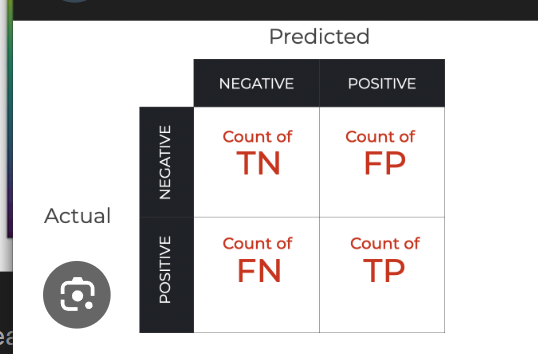